In [1]:
import tensorflow as tf

In [2]:
import IPython.display as display
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
import pathlib
data_dir = pathlib.Path("./Downloads/bundle_archive/Mask_Datasets/")

In [26]:
train_dir = os.path.join(data_dir, "Train")
validation_dir = os.path.join(data_dir, 'Validation')

In [27]:
train_mask_dir = os.path.join(train_dir, 'Mask')  # directory with our training cat pictures
train_nomask_dir = os.path.join(train_dir, 'No_Mask')  # directory with our training dog pictures
validation_mask_dir = os.path.join(validation_dir, 'Mask')  # directory with our validation cat pictures
validation_nomask_dir = os.path.join(validation_dir, 'No_Mask')  # directory with our validation dog pictures

In [28]:
print(validation_mask_dir)

Downloads\bundle_archive\Mask_Datasets\Validation\Mask


In [29]:
num_mask_tr = len(os.listdir(train_mask_dir))
num_nomask_tr = len(os.listdir(train_nomask_dir))

num_mask_val = len(os.listdir(validation_mask_dir))
num_nomask_val = len(os.listdir(validation_nomask_dir))

total_train = num_mask_tr + num_nomask_tr
total_val = num_mask_val + num_nomask_val

In [30]:
print('total training mask images:', num_mask_tr)
print('total training no mask images:', num_nomask_tr)

print('total validation mask images:', num_mask_val)
print('total validation nomask images:', num_nomask_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training mask images: 350
total training no mask images: 400
total validation mask images: 150
total validation nomask images: 200
--
Total training images: 750
Total validation images: 350


In [47]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
epoch = 3

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [49]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 750 images belonging to 2 classes.


In [50]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 350 images belonging to 2 classes.


In [51]:
sample_training_images, _ = next(train_data_gen)

In [52]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

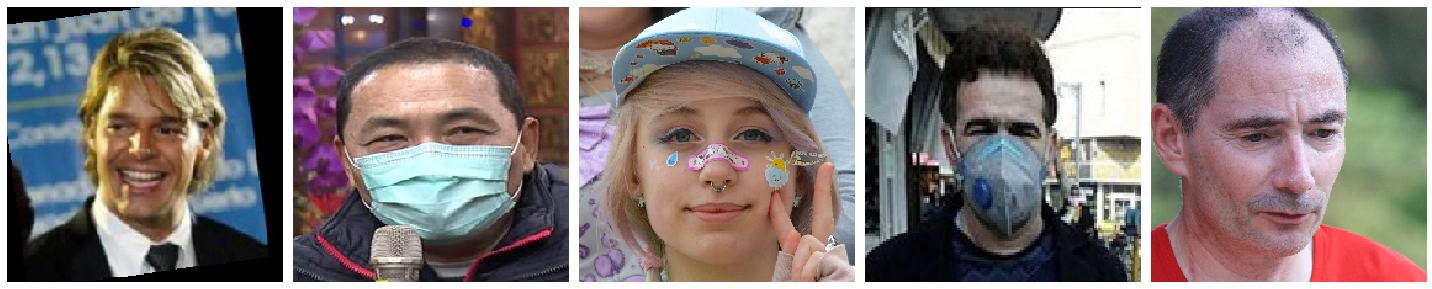

In [53]:
plotImages(sample_training_images[:5])

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [57]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=epoch,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23 steps, validate for 10 steps
Epoch 1/3
23/23 [==============================] - 40s 2s/step - loss: 0.8351 - accuracy: 0.6588 - val_loss: 0.3615 - val_accuracy: 0.7500
Epoch 2/3
23/23 [==============================] - 45s 2s/step - loss: 0.1841 - accuracy: 0.9318 - val_loss: 0.0795 - val_accuracy: 0.9719
Epoch 3/3
23/23 [==============================] - 44s 2s/step - loss: 0.0908 - accuracy: 0.9582 - val_loss: 0.1447 - val_accuracy: 0.9594


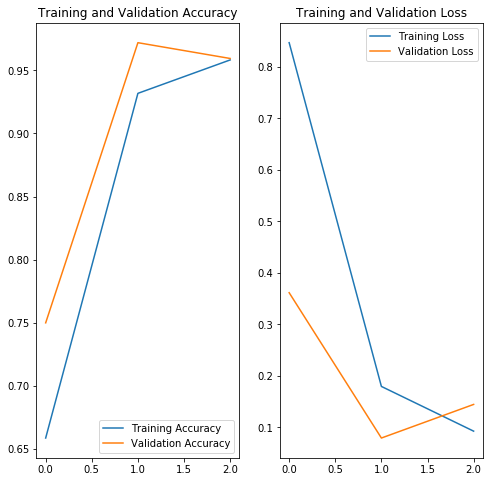

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()